# Bank Loan Default Prediction

*Created by: Anna Sukhareva, data scientist  
Antwerpen, Belgium  
Date: October 28, 2019  
Contacts: anna@linefeed.be*  
***

### Table of Contents
Stage 1 : Business Understanding  
Stage 2 : Analytic Approach  
Stage 3 : Data Requirements  
Stage 4 : Data Collection  
Stage 5 : Data Understanding  
Stage 6 : Data Preparation  
Stage 7 : Modeling  
Stage 8 : Evaluation  
Sample of use  
***

### Stage 1 : Business Understanding
**Problem:**  
The loan is one of the most important products of the banking. All the banks are trying to figure out effective business strategies to persuade customers to apply their loans. However, there are some customers behave negatively after their application are approved. Loans default will cause huge loss for the banks. To prevent this situation, banks have to find some methods to predict customers’ behaviours.   

**Question:**  
Can we predict a loan default?

### Stage 2 : Analytic Approach
As the question requires a yes/no answer, next classification models will be built:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression  

To evaluate models performance, we use:
+ Jaccard score, 
+ F1 score,
+ Logistic regression scores (where applicable)

To evaluate models performance, we use the out of sample set. 


### Stage 3 : Data Requirements
**Data content:** To answer the question we need data about past loans, having the next information:  data about loan (loan status, loan amount, terms, effective date, due date) and data about customer (age, gender, education level).  
**Data formats:** CSV format  
**Data sources:** corporative information from the bank.

### Stage 4 :  Data Collection
Importing libraries:

In [28]:
! pip install seaborn

In [29]:
# computation
import numpy as np
import pandas as pd
import itertools

# visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import f1_score, jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

Collecting the data, [source](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv):

In [30]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-10-28 14:26:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2019-10-28 14:26:27 (1.06 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [31]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [32]:
df.shape

(346, 10)

### Stage 5 : Data Understanding  

The dataset consists of 2 parts:
* Train dataset,
* Out of sample dataset.

This dataset is about past loans.  The train dataset includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:
+ **Loan_status**: Whether a loan is paid off on in collection  
+ **Principal**: Basic principal loan amount  
+ **Terms**: Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule  
+ **Effective_date**: When the loan got originated and took effects  
+ **Due_date**: Since it’s one-time payoff schedule, each loan has one single due date  
+ **Age**: Age of applicant  
+ **Education**: Education of applicant  
+ **Gender**: The gender of applicant  

In [33]:
# Converting to date time object 

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### Data visualization and pre-processing

**How many of each class is in our data set?** 

In [34]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

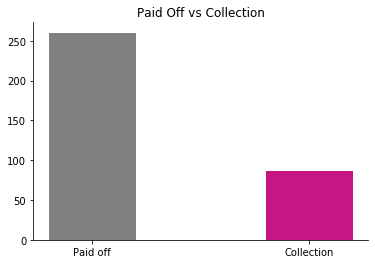

In [35]:
# Bar chart: Paid Off vs Collection

height = [260, 86]
bars = ['Paid off', 'Collection']
y_pos = np.arange(len(bars))
bar_width = 0.35

fig, ax = plt.subplots()
plt.bar(y_pos, height, color = ('grey', 'mediumvioletred'), width=0.4)
plt.xticks(y_pos, bars)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Paid Off vs Collection')

plt.show()

**Conclusion**: 260 people have paid off the loan on time while 86 have gone into collection.


**Do gender & loan amount have impact on loan status?**

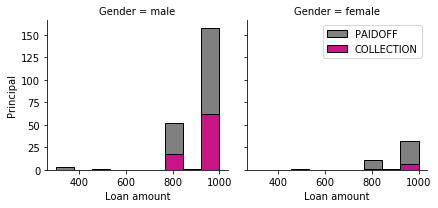

In [36]:
# Bar Chart: Do gender & loan amount have impact on loan status?

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
palette ={"PAIDOFF":"grey","COLLECTION":"mediumvioletred"}
gender = sns.FacetGrid(df, col="Gender", hue="loan_status", palette=palette, col_wrap=2)
gender.map(plt.hist, 'Principal', bins=bins, ec="k")
gender.set_axis_labels("Loan amount", "Principal")
gender.axes[-1].legend()
plt.show()

**Conclusion**: Yes, the default loans are tent to be over 700 for male customers, over 900 for female customers.

**Do age & loan amount have impact on loan status?**

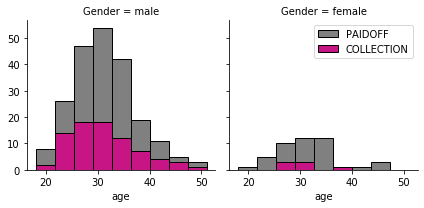

In [37]:
# Bar Chart: Do age & loan amount have impact on loan status?

palette ={"PAIDOFF":"grey","COLLECTION":"mediumvioletred"}
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette=palette, col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

**Conclusion**: Yes, most of the default loans are tent to be: for female customers between 25 and 40 y.o., for male customers: 25-40. In other way, as histogram of default loans for male customers follow the shape of paid off loans, we think age have less impact.


### Stage 6 : Data Preparation & Feature engineering

#### Checking the day of the week
At what day of the week default loans tend to be taken?

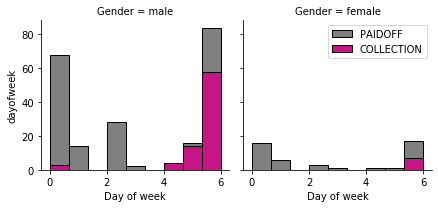

In [38]:
#At what day of the week default loans tend to be taken?

df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
palette ={"PAIDOFF":"grey","COLLECTION":"mediumvioletred"}
gender = sns.FacetGrid(df, col="Gender", hue="loan_status", palette=palette, col_wrap=2)
gender.map(plt.hist, 'dayofweek', bins=bins, ec="k")
gender.axes[-1].legend()
gender.set_axis_labels("Day of week", "dayofweek")
plt.show()

**Conclusion**: We see that people who get the loan at the end of the week don't pay it off, so we use Feature binarization to set a threshold values less then day 4 :

In [39]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


#### Checking gender

In [40]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

**Conclusion**: 86 % of female pay there loans while only 73 % of males pay there loan.  
Converting male to 0 and female to 1:

In [41]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


#### Checking education

In [42]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [43]:
# Feature before One Hot Encoding
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


Converting categorical varables to binary variables:

In [44]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Stage 7 : Modeling 

Selecting feature sets, X:

In [47]:
X = Feature
X[0:2]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0


What are the lables?

In [48]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Normalizing data 
Data Standardization give data zero mean and unit variance 

In [49]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108]])

#### Train/Test/Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


#### Modeling

**K Nearest Neighbor(KNN)**

In [51]:
k = 7
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [52]:
y_predict_knn = knn.predict(X_test)
y_predict_knn[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Looking for the best k:

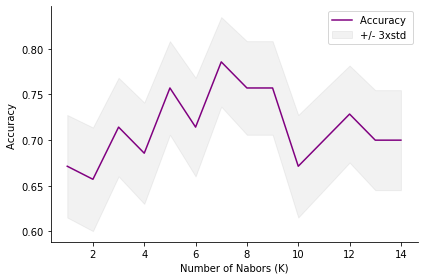

The best accuracy was with 0.79 with k= 7


In [53]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predict_knn = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict_knn)

    
    std_acc[n-1]=np.std(y_predict_knn==y_test)/np.sqrt(y_predict_knn.shape[0])

fig, ax = plt.subplots()
plt.plot(range(1,Ks),mean_acc,'purple')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10, color = 'grey')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

print( "The best accuracy was with", mean_acc.max().round(2), "with k=", mean_acc.argmax()+1) 

**Decision Tree**

In [54]:
max_depth = 4
criterion = "entropy"
decitionTree = DecisionTreeClassifier(criterion= criterion, max_depth = max_depth)
decitionTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
decitionTree.fit(X_train, y_train)
y_predict_decitionTree = decitionTree.predict(X_test)
y_predict_decitionTree[0:5]

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

**Support Vector Machine**

In [56]:
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train) 
svm

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
y_predict_svm = svm.predict(X_test)
y_predict_svm[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

**Logistic Regression**

In [58]:
C=0.01
solver='liblinear'
logisticRegression = LogisticRegression(C=C, solver=solver).fit(X_train,y_train)
logisticRegression

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_predict_logisticRegression = logisticRegression.predict(X_test)
y_predict_logisticRegression[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

KNN Accuracy:  0.7
Decision Trees's Accuracy:  0.61
SVM Accuracy:  0.74
LogisticRegression Accuracy:  0.69


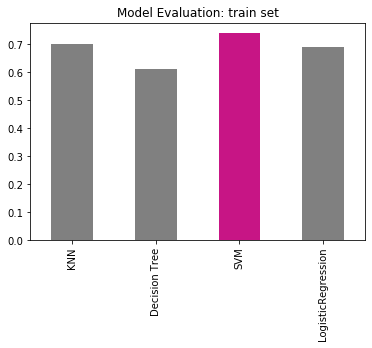

In [60]:
#evaluation
knn_score = metrics.accuracy_score(y_test, y_predict_knn).round(2)
print("KNN Accuracy: ", knn_score)

decisionTree_score = metrics.accuracy_score(y_test, y_predict_decitionTree).round(2)
print("Decision Trees's Accuracy: ", decisionTree_score)

SVM_score = metrics.accuracy_score(y_test, y_predict_svm).round(2)
print("SVM Accuracy: ", SVM_score)

LogisticRegression_score = metrics.accuracy_score(y_test, y_predict_logisticRegression).round(2)
print("LogisticRegression Accuracy: ", LogisticRegression_score)


d_ = {'Accuracy score': [knn_score, decisionTree_score, SVM_score, LogisticRegression_score]}
train_report = pd.DataFrame(data=d_, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])

#visualization
color = [('grey', 'grey', 'mediumvioletred', 'grey')]
train_report.plot(kind='bar', color = color, legend=None)
plt.title('Model Evaluation: train set')
plt.show()

### Stage 8 : Model Evaluation using Out of sample set

Downloading the set:

In [61]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-10-28 14:27:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2019-10-28 14:27:45 (90.7 MB/s) - ‘loan_test.csv’ saved [3642/3642]



Making same data preparation as with the train set:

In [62]:
outOfSample = pd.read_csv('loan_test.csv')

#coreecting data 

outOfSample['due_date'] = pd.to_datetime(outOfSample['due_date'])
outOfSample['effective_date'] = pd.to_datetime(outOfSample['effective_date'])
outOfSample['dayofweek'] = outOfSample['effective_date'].dt.dayofweek
outOfSample['weekend'] = outOfSample['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
outOfSample['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature_outOfSample = outOfSample[['Principal','terms','age','Gender','weekend']]
Feature_outOfSample = pd.concat([Feature_outOfSample,pd.get_dummies(outOfSample['education'])], axis=1)
Feature_outOfSample.drop(['Master or Above'], axis = 1,inplace=True)
Feature_outOfSample.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [63]:
X_outOfSample = Feature_outOfSample
y_outOfSample = outOfSample['loan_status'].values
X_outOfSample = preprocessing.StandardScaler().fit(X_outOfSample).transform(X_outOfSample)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


**Running the models:**

In [64]:
#K Neighbor
y_predict_knn_outOfSample = knn.predict(X_outOfSample)

knn_jaccard_score = jaccard_similarity_score(y_outOfSample, y_predict_knn_outOfSample).round(2)
knn_f1_score = f1_score(y_outOfSample, y_predict_knn_outOfSample, average='weighted').round(2)
print("K Neighbor jaccard_score: ", knn_jaccard_score)
print("K Neighbor f1_score: ", knn_f1_score)

K Neighbor jaccard_score:  0.69
K Neighbor f1_score:  0.66


In [65]:
#Decision Tree
y_predict_decitionTree_outOfSample = decitionTree.predict(X_outOfSample)

DecisionTrees_jaccard_score = jaccard_similarity_score(y_outOfSample, y_predict_decitionTree_outOfSample).round(2)
DecisionTrees_f1_score = f1_score(y_outOfSample, y_predict_decitionTree_outOfSample, average='weighted').round(2)
print("DecisionTrees's jaccard_score: ", DecisionTrees_jaccard_score)
print("DecisionTrees's f1_score: ", DecisionTrees_f1_score)

DecisionTrees's jaccard_score:  0.72
DecisionTrees's f1_score:  0.74


In [66]:
#SVM
y_predict_outOfSample = svm.predict(X_outOfSample)

SVM_jaccard_score = jaccard_similarity_score(y_outOfSample, y_predict_outOfSample).round(2)
SVM_f1_score = f1_score(y_outOfSample, y_predict_outOfSample, average='weighted').round(2)
print("SVM f1_score: ", SVM_jaccard_score)
print("SVM jaccard_score: ", SVM_f1_score)

SVM f1_score:  0.8
SVM jaccard_score:  0.76


In [67]:
#LogRes
y_predict_logisticRegression_outOfSample = logisticRegression.predict(X_outOfSample)
y_outOfSample_prob = logisticRegression.predict_proba(X_outOfSample)

LogisticRegression_jaccard_score = jaccard_similarity_score(y_outOfSample, y_predict_logisticRegression_outOfSample).round(3)
LogisticRegression_f1_score = f1_score(y_outOfSample, y_predict_logisticRegression_outOfSample, average='weighted').round(3)
LogisticRegression_LogLoss = log_loss(y_outOfSample, y_outOfSample_prob).round(3)
print("LogisticRegression jaccard_score: ", LogisticRegression_jaccard_score)
print("LogisticRegression f1_score: ", LogisticRegression_f1_score)
print("LogisticRegression LogLoss: ", LogisticRegression_LogLoss)

LogisticRegression jaccard_score:  0.741
LogisticRegression f1_score:  0.66
LogisticRegression LogLoss:  0.567


### Report:

In [68]:
d = {
    'Jaccard score': [knn_jaccard_score, DecisionTrees_jaccard_score, SVM_jaccard_score, LogisticRegression_jaccard_score],
    'F1 score': [knn_f1_score, DecisionTrees_f1_score, SVM_f1_score, LogisticRegression_f1_score],
    'Logistic Regression score': ['NA', 'NA', 'NA', LogisticRegression_LogLoss]
}
report = pd.DataFrame(data=d, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
report

,Jaccard score,F1 score,Logistic Regression score
KNN,0.690,0.66,NA
Decision Tree,0.720,0.74,NA
SVM,0.800,0.76,NA
LogisticRegression,0.741,0.66,0.567


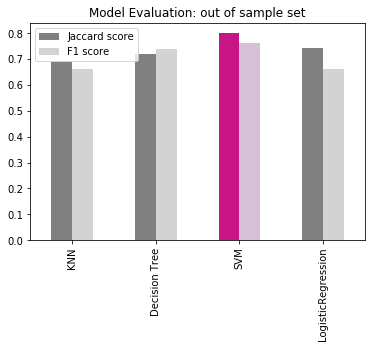

In [69]:
color = [('grey', 'grey', 'mediumvioletred', 'grey'), ('lightgrey','lightgrey', 'thistle', 'lightgrey')]
report.plot(kind='bar', color = color)

plt.title('Model Evaluation: out of sample set')

plt.show()

**Conclusion: Support Vector Machine gives best score on out of sample set:**  
+ Jaccard score 0,80%  
+ F1 score 0, 76%  

Thanks for reading.